In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [107]:
def function(x):
    return - np.sin(x) + np.cos(x) ** 2 - 5  + 5/(x ** 2 + 20)

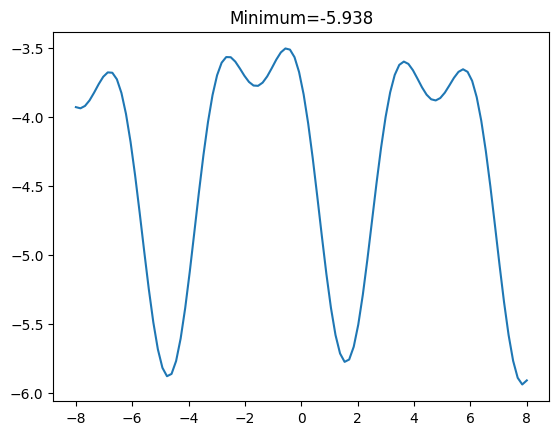

In [119]:
X = np.linspace(-8, 8, 100)
y = function(X)
minimum = min(y)
plt.title(f'Minimum={round(minimum, 3)}')
plt.plot(X, y)
plt.show()

## Kodowanie
Kodowanie binarne przypisjue każdej jednostce ciąg bitów reprezentujący liczbę z przedziału $<-8; 8>$.

In [136]:
def encode(x):
    binary = format(int((x+8)*1000), 'b')
    binary = binary.zfill(14)
    return binary


def decode(binary):
    return round(int(binary, 2) / 1000 - 8, 3)

In [224]:
format(16000, 'b')

'11111010000000'

## Mutacja
Mutacja polega na zmianie losowaego bitu u danej jednostki.

In [137]:
def mutate(binary):
    mutation_point = np.random.randint(0, len(binary)-1)
    if binary[mutation_point] == '0':
        binary = binary[:mutation_point] + '1' + binary[mutation_point+1:]
    else:
        binary = binary[:mutation_point] + '0' + binary[mutation_point+1:]
    return binary

## Krzyżowanie
W celu skrzyżowania dwóch osobników losowa bybieram punkt krzyżowy w którym przetniemy oba chromosomy i zmieszamy w ten sposób dwa osobniki.

In [138]:
def crossover(binary1, binary2):
    crossover_point = np.random.randint(0, len(binary1)-1)
    new_binary1 = binary1[:crossover_point] + binary2[crossover_point:]
    new_binary2 = binary2[:crossover_point] + binary1[crossover_point:]
    return new_binary1, new_binary2

In [160]:
def gen_alg(num_iterations, population_size, crossover_rate, mutation_rate):
    population = [encode(np.round(np.random.uniform(-8, 8), 3)) for _ in range(population_size)]
    values = [decode(binary) for binary in population]
    best_value = min(values, key=function)
    best_binary = population[values.index(best_value)]
    best_values = [best_value]
    
    best_values_gen = [best_value]

    for i in range(num_iterations):
        new_population = []
        for j in range(len(population) // 2):
            # selekcja
            random.shuffle(population)
            parent1, parent2 = population[0], population[1]
            if len(parent2) < 8 or len(parent1) < 8:
                print(population)
            # krzyżowanie
            if random.random() <= crossover_rate:
                child1, child2 = crossover(parent1, parent2)
                new_population.append(child1)
                new_population.append(child2)
            else:
                new_population.append(population[0])
                new_population.append(population[1])
        
        # mutacja
        for j in range(len(population)):
            if random.random() < mutation_rate:
                population[j] = mutate(population[j])

        # Aktualizacja najlepszej wartości
        values = [decode(binary) for binary in population]
        current_best_value = min(values, key=function)
        if current_best_value < best_value:
            best_value = current_best_value
            best_binary = population[values.index(best_value)]
        best_values_gen.append(best_value)

    best_values = [function(value) for value in best_values_gen]
    return best_values_gen

## Analiza wyników

In [218]:
def visualize_results(best_values):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    X = np.linspace(-8, 8, 100)
    y = function(X)
    minimum = min(y)
    best_values_f = [function(x) for x in best_values]

    ax1.set_title(f'Minimum={round(minimum, 3)}')
    ax1.scatter(x=best_values, y=best_values_f, c='red', label='najlepsze wartości')
    ax1.legend()
    ax1.plot(X, y)
    ax1.set(ylabel='Y - wartość funkcji', xlabel='X')

    ax2.set_title('Wartość argumentu w kolejnych iteracjach')
    ax2.plot(sorted(best_values_f, reverse=True))
    ax2.set(xlabel='Iteracje ', ylabel='X')
    plt.show()

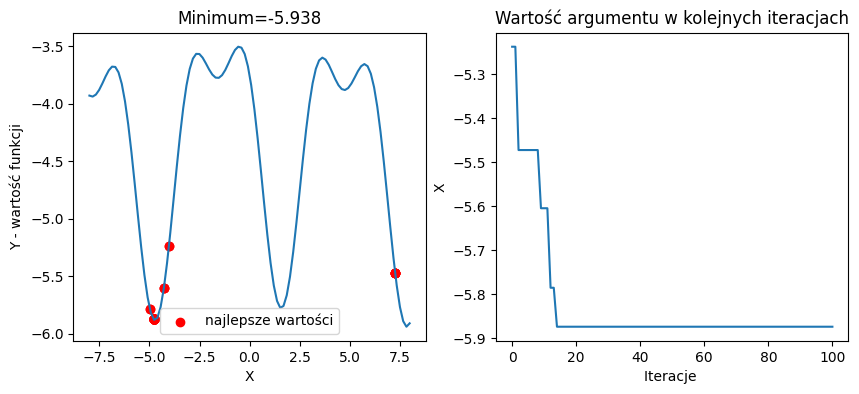

In [219]:
res = gen_alg(num_iterations=100,
        population_size=10,
        crossover_rate=0.01, 
        mutation_rate=0.08)

visualize_results(res)

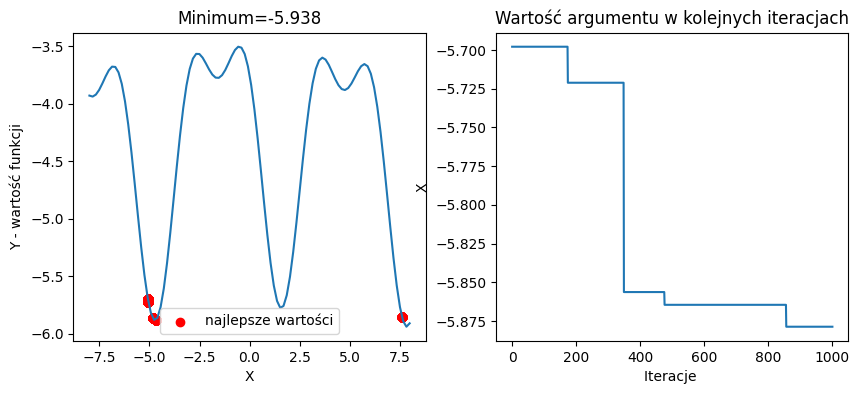

In [220]:
res = gen_alg(num_iterations=1000,
        population_size=10,
        crossover_rate=0.01, 
        mutation_rate=0.08)

visualize_results(res)

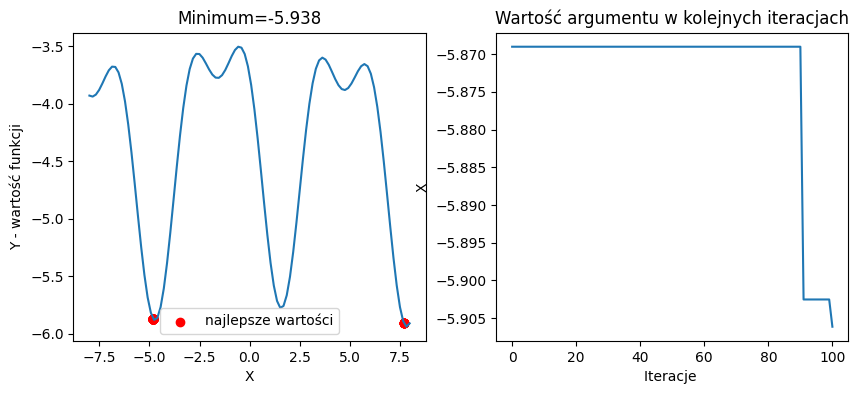

In [221]:
res = gen_alg(num_iterations=100,
        population_size=100,
        crossover_rate=0.01, 
        mutation_rate=0.08)

visualize_results(res)